In [1]:
''' Imports '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gizmo_analysis as gizmo
import utilities as ut
import time as t
import gc
from astropy.stats import histogram
import sys

In [2]:
### LOADING AND READING IN THE SIMULATION (FIRST SNAPSHOT) ###

#simname = '/scratch/04712/tg840119/m12i_m7e3_HD_fire3_fireBH_Sep052021_hr_crdiffc690_sdp1e10_gacc31_fa0.5'                                                         
#simdir = '/scratch/04712/tg840119/m12i_m7e3_HD_fire3_fireBH_Sep052021_hr_crdiffc690_sdp1e10_gacc31_fa0.5'

#part = gizmo.io.Read.read_snapshots(['star','gas'],'index', 200 , simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)

In [3]:
outpath = '/work2/08006/dbenton/stampede3/velocity/'

In [4]:
#bins = np.loadtxt('feh_bins.txt')
#counts = np.loadtxt('feh_counts.txt')
#plt.hist(bins[:-1], bins, weights=counts, log=True)
#plt.savefig('hist_out')

In [5]:
t1 = t.time()

diffuse_outflow_v_R = np.loadtxt(outpath + 'diffuse_outflow_v_R475_501.txt')
diffuse_inflow_v_R = np.loadtxt(outpath + 'diffuse_inflow_v_R475_501.txt')


dense_outflow_v_R = np.loadtxt(outpath + 'dense_outflow_v_R475_501.txt')
dense_inflow_v_R = np.loadtxt(outpath + 'dense_inflow_v_R475_501.txt')
#dense_low_feh475_501.txt
#dense_high_feh475_501.txt

t2 = t.time()
print(t2 - t1)

0.30179548263549805


In [6]:
min_inflow_v_R = np.min(np.array(np.min(dense_inflow_v_R),np.min(diffuse_inflow_v_R)))
max_inflow_v_R = np.max(np.array(np.max(dense_inflow_v_R),np.max((diffuse_inflow_v_R))))
min_outflow_v_R = np.min(np.array(np.min(dense_outflow_v_R),np.min(diffuse_outflow_v_R)))
max_outflow_v_R = np.max(np.array(np.max(dense_outflow_v_R),np.max(diffuse_outflow_v_R)))


print(len(diffuse_inflow_v_R))
print(len(dense_inflow_v_R))
print(len(diffuse_outflow_v_R))
print(len(dense_outflow_v_R))


bin_edges_inflow_v_R = np.geomspace(min_inflow_v_R, max_inflow_v_R, 31)
bin_edges_outflow_v_R = np.geomspace(min_outflow_v_R, max_outflow_v_R, 31)


counts_inflow_v_R, bins_inflow_v_R = histogram(dense_inflow_v_R, bins = bin_edges_inflow_v_R)
diff_counts_inflow_v_R, bins_inflow_v_R = histogram(diffuse_inflow_v_R, bins = bin_edges_inflow_v_R)
counts_outflow_v_R, bins_outflow_v_R = histogram(dense_outflow_v_R, bins = bin_edges_outflow_v_R)
diff_counts_outflow_v_R, bins_outflow_v_R = histogram(diffuse_outflow_v_R, bins = bin_edges_outflow_v_R)


frac_counts_inflow_v_R = counts_inflow_v_R/(counts_inflow_v_R+diff_counts_inflow_v_R)
print(frac_counts_inflow_v_R)
frac_counts_outflow_v_R = counts_outflow_v_R/(counts_outflow_v_R+diff_counts_outflow_v_R)
print(frac_counts_outflow_v_R)

binwidth_inflow_v_R = bin_edges_inflow_v_R[1] - bin_edges_inflow_v_R[0]
bin_middles_inflow_v_R = bin_edges_inflow_v_R[0:-1] + binwidth_inflow_v_R/2.
binwidth_outflow_v_R = bin_edges_outflow_v_R[1] - bin_edges_outflow_v_R[0]
bin_middles_outflow_v_R = bin_edges_outflow_v_R[0:-1] + binwidth_outflow_v_R/2.

188043
994
137173
8923
[0.03205128 0.05633803 0.05333333 0.16470588 0.25       0.45901639
 0.51724138 0.64912281 0.58974359 0.58227848 0.73134328 0.78082192
 0.7961165  0.8045977  0.7761194  0.83544304 0.82278481 0.82894737
 0.7826087  0.81538462 0.82608696 0.82352941 0.66666667 0.91304348
 0.6875     0.86666667 1.         1.                nan 1.        ]
[0.01198288 0.11942257 0.29365079 0.44582043 0.52599758 0.62898551
 0.64759036 0.68118196 0.68495575 0.71310116 0.73863636 0.76751592
 0.74746009 0.76190476 0.78428351 0.79115854 0.7611465  0.7877193
 0.74896266 0.77534247 0.73417722 0.77272727 0.76923077 0.82242991
 0.79661017 0.77777778 0.77777778 0.81818182 0.75       0.66666667]


/tmp/ipykernel_2296930/3161039888.py:23: RuntimeWarning: invalid value encountered in divide
  frac_counts_inflow_v_R = counts_inflow_v_R/(counts_inflow_v_R+diff_counts_inflow_v_R)


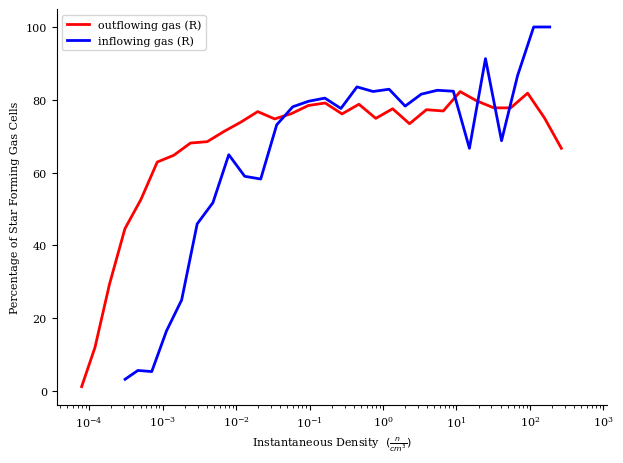

In [11]:
fig, ax = plt.subplots()

ax.plot(bin_middles_outflow_v_R, (frac_counts_outflow_v_R*100.0), label='outflowing gas (R)', color='red', linewidth = 2)
ax.plot(bin_middles_inflow_v_R, (frac_counts_inflow_v_R*100.0), label='inflowing gas (R)', color='blue', linewidth=2)

#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Percentage of Star Forming Gas Cells')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
#plt.text(0.65, 0.25, 'm12i FIRE-3 disk\nFe/H ≥ -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#plt.text(0.05, 0.95, 'm12i FIRE-3 disk\nFe/H < -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes,verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95
#bottom right = 0.65, 0.25



# Save the plot to a file (optional)
plt.savefig(outpath + 'D_D_velocity_R_disk',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

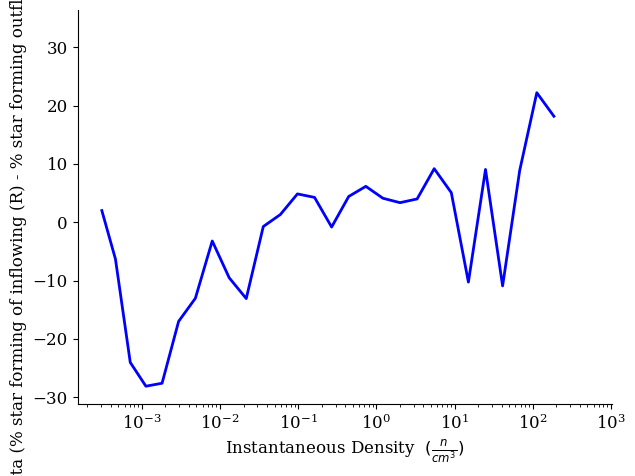

In [8]:
delta = frac_counts_inflow_v_R - frac_counts_outflow_v_R

fig, ax = plt.subplots()

ax.plot(bin_middles_inflow_v_R, (delta*100), color='blue', linewidth = 2)
#ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of inflowing (R) - % star forming outflowing (R))')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
#plt.text(0.65, 0.25, 'm12i FIRE-3 disk\nFe/H ≥ -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#plt.text(0.05, 0.95, 'm12i FIRE-3 disk\nFe/H < -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes,verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_low_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

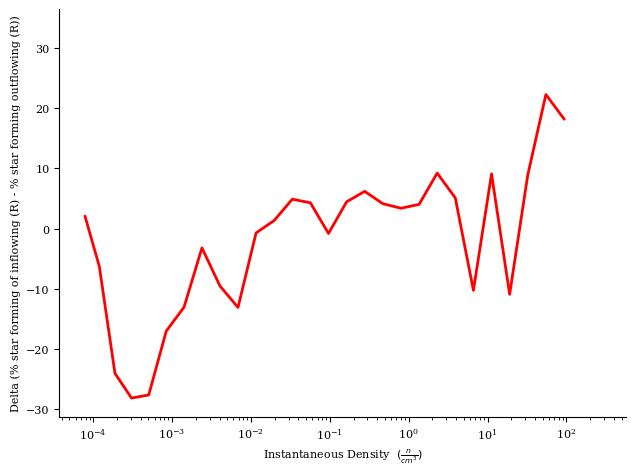

In [10]:
delta = frac_counts_inflow_v_R - frac_counts_outflow_v_R

fig, ax = plt.subplots()

#ax.plot(bin_middles_inflow_v_z, (delta*100), color='blue', linewidth = 2)
ax.plot(bin_middles_outflow_v_R, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of inflowing (R) - % star forming outflowing (R))')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
#plt.text(0.65, 0.25, 'm12i FIRE-3 disk\nFe/H ≥ -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#plt.text(0.05, 0.95, 'm12i FIRE-3 disk\nFe/H < -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes,verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95

# Save the plot to a file (optional)
plt.savefig(outpath + 'delta_D_D_v_R',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

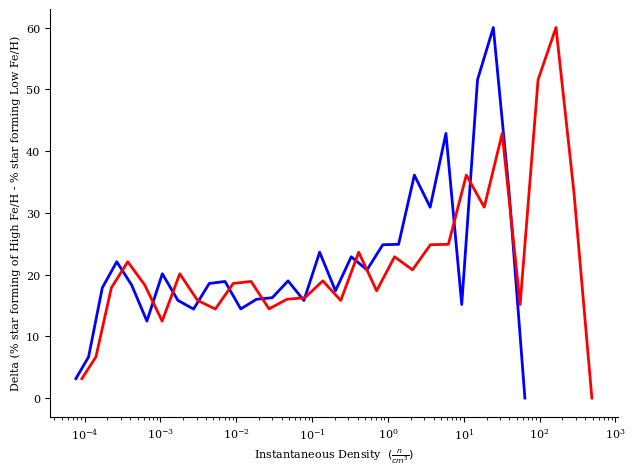

In [20]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_both_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()